In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os,sys
#sys.path.append(os.path.expanduser('~')+'/audio_class/python')
sys.path.append('../../audio_class/python')
from IPython.display import Audio
import utils
import ridgeDTW
import multiprocessing
from joblib import Parallel,delayed

os.system("taskset -p 0xff %d" % os.getpid())

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
DATAROOT = './BBSPjun5_13/'

In [31]:
'''
for file in os.listdir(DATAROOT):
    print(file)
    fs,data = utils.readSegment(DATAROOT+file)
    break
'''
fs,data = utils.readSegment(DATAROOT+'day2-1370485107.wav')

In [32]:
print('fs = %s' % fs)
(nCh,nDat) = np.shape(data)
print('nCh = %s, nDat = %s' % (nCh,nDat))
Audio(data[0,:],rate=fs)

fs = 44100
nCh = 8, nDat = 2646000


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [50]:
def ridgePar(k,data,fs,btTime):
    S,F,T,tBlk,tInc = utils.spectrographic(data[k,:],fs,0.032,0.004,1024)
    X = ridgeDTW.ridgeTracker(S,np.median(S.flatten()),btTime,tInc,isMaxPool=False)
    return T,F,X

btTime = 0.002
rvs = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(ridgePar)(k,data,fs,btTime) for k in range(nCh))

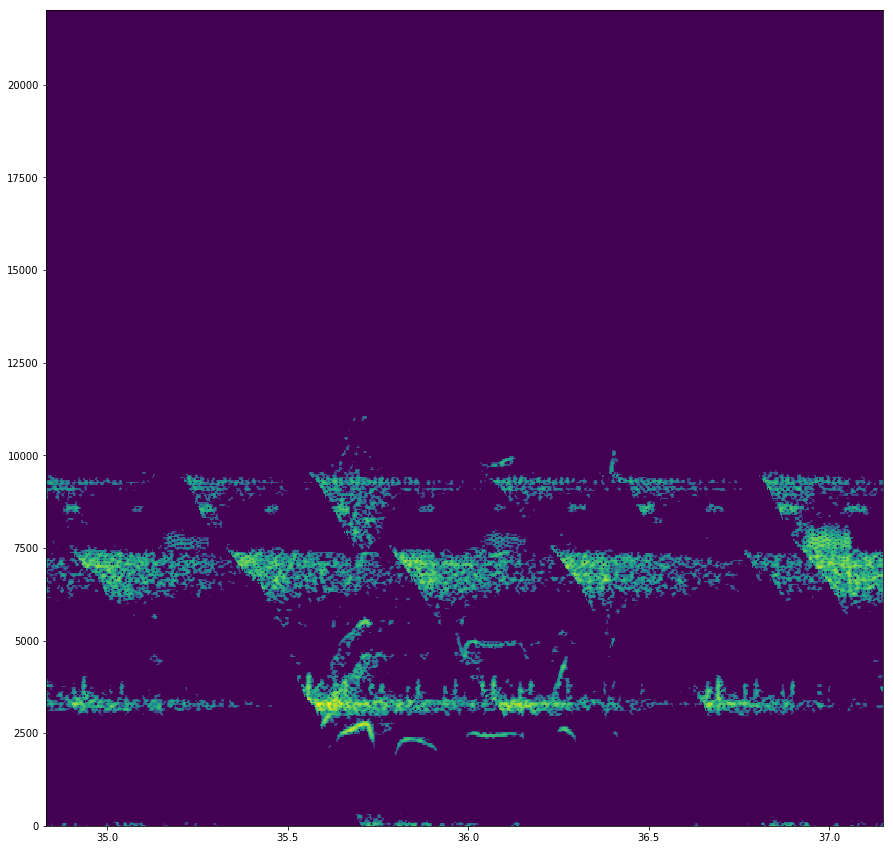

In [55]:
plt.figure(figsize=(15,15))
T,F,X = rvs[4]
plt.pcolormesh(T[12000:12800],F,np.sqrt(X[:,12000:12800]))

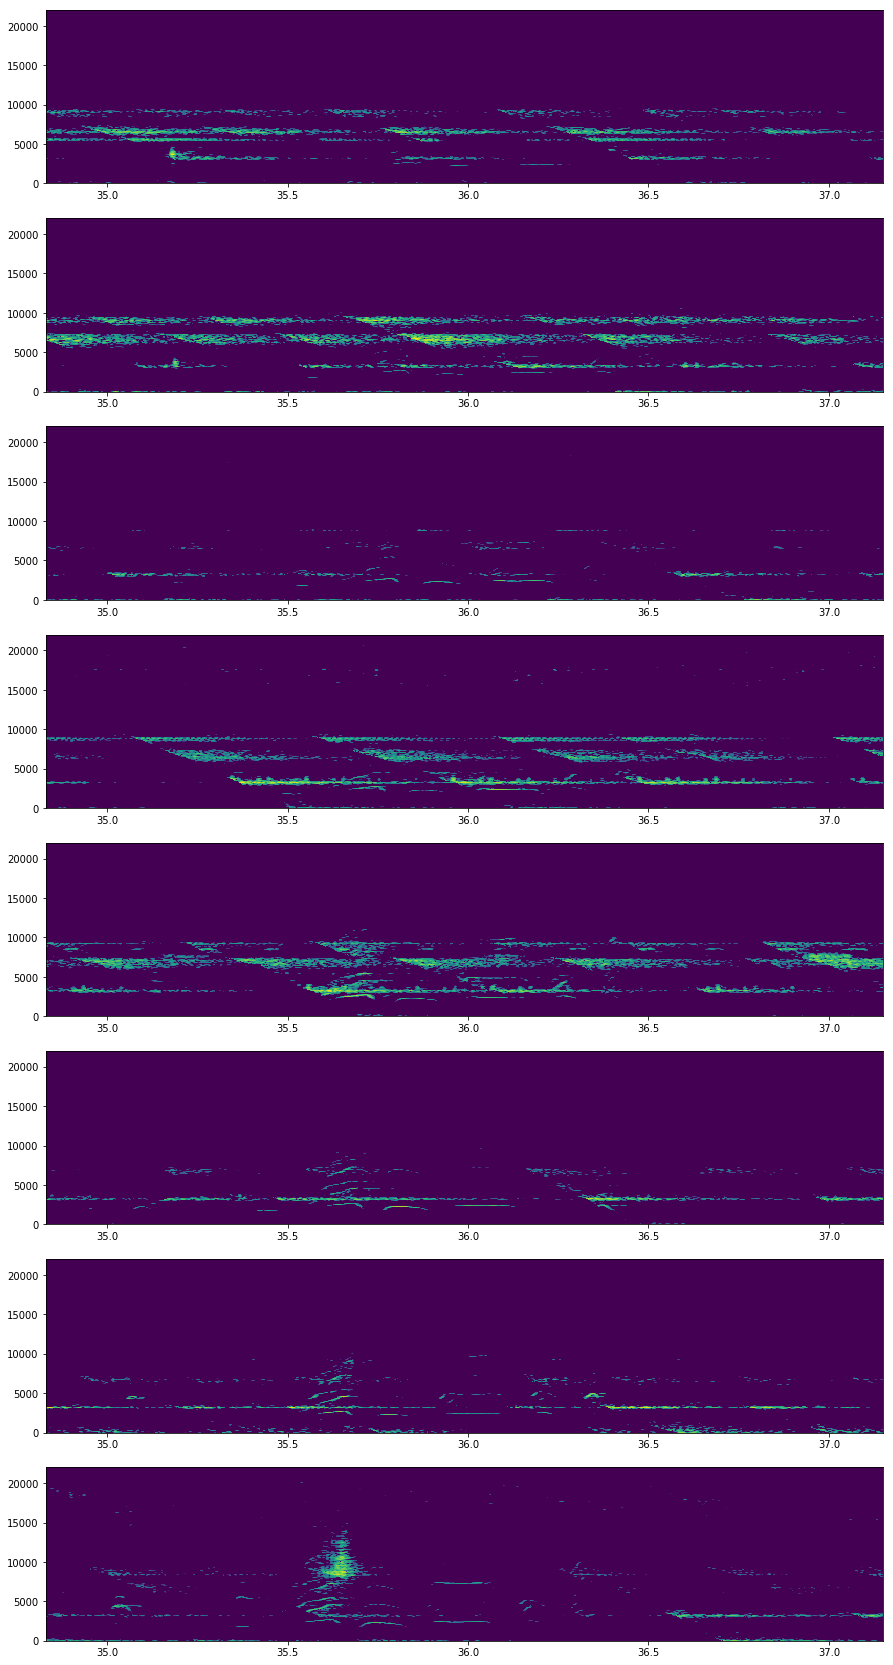

In [57]:
plt.figure(figsize=(15,30))
for k in range(nCh):
    plt.subplot(nCh,1,1+k)
    T,F,X = rvs[k]
    plt.pcolormesh(T[12000:12800],F,np.sqrt(X[:,12000:12800]))